<a href="https://colab.research.google.com/github/manikanta7755/Project-Arline-Baggage-Surveillance-Analytics/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/gdrive/MyDrive/Project/BagTrack_Report.csv',encoding="ISO-8859-1")

In [ ]:
data.head()

,BagID,MVXR,BHSID,L1Decision,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime
0,5178,2,0312365478_0280SD,Reject,01/01/2020 00:16:19,Time out,32661.0,01/01/2020 00:16:46,Reject,32887,01/01/2020 00:16:54
1,5180,2,0312365545_0282SD,Reject,01/01/2020 00:19:28,Accept,32661.0,01/01/2020 00:19:41,-,-,-
2,5187,2,0312365871_0293SD,Reject,01/01/2020 00:24:39,Accept,32153.0,01/01/2020 00:24:44,-,-,-
3,5189,2,0312365971_0296SD,Reject,01/01/2020 00:28:31,Accept,32153.0,01/01/2020 00:28:42,-,-,-
4,5196,2,0312366152_0304SD,Reject,01/01/2020 00:33:42,Accept,32153.0,01/01/2020 00:33:47,-,-,-


In [ ]:
data = data.rename(columns={"MVXR":"XBIS"})

In [ ]:
data.shape

(1048574, 11)

In [ ]:
data.columns

Index(['BagID', 'XBIS', 'BHSID', 'L1Decision', 'Level1Decision', 'L2Decision',
       'L2LoginID', 'L2DecisionTime', 'L3Decision', 'L3LoginID',
       'L3DecisionTime'],
      dtype='object')

In [ ]:
data.columns=data.columns.str.replace(' ','')
data.columns

Index(['BagID', 'XBIS', 'BHSID', 'L1Decision', 'Level1Decision', 'L2Decision',
       'L2LoginID', 'L2DecisionTime', 'L3Decision', 'L3LoginID',
       'L3DecisionTime'],
      dtype='object')

In [ ]:
airways= {'001': 'American Airlines',
 '002': 'CargoItalia (alternate)',
 '005': 'Continental Airlines',
 '006': 'Delta Air Lines',
 '012': 'Northwest Airlines (alternate site)',
 '014': 'Air Canada',
 '016': 'United Airlines Cargo',
 '018': 'Canadian Airlines Int´l',
 '020': 'Lufthansa Cargo AG',
 '023': 'Fedex',
 '027': 'Alaska Airlines',
 '037': 'USAirways',
 '042': 'VARIG Brazilian Airlines',
 '043': 'Dragonair',
 '045': 'LAN Chile',
 '047': 'TAP Air Portugal',
 '048': 'Cyprus Airways',
 '050': 'Olympic Airways',
 '053': 'Aer Lingus Cargo',
 '055': 'Alitalia',
 '057': 'Air France',
 '058': 'Indian Airlines',
 '061': 'Air Seychelles',
 '064': 'Czech Airlines',
 '065': 'Saudi Arabian Airlines',
 '070': 'Syrian Arab Airlines',
 '071': 'Ethiopian Airlines',
 '072': 'Gulf Air',
 '074': 'KLM Cargo',
 '075': 'Iberia',
 '076': 'Middle East Airlines',
 '077': 'Egyptair',
 '079': 'Philippine Airlines',
 '080': 'LOT Polish Airlines',
 '081': 'Qantas Airways',
 '082': 'Brussels Airlines',
 '083': 'South African Airways',
 '086': 'Air New Zealand',
 '090': 'Kingfisher Airlines',
 '093': 'KD Avia',
 '096': 'Iran Air',
 '098': 'Air India',
 '105': 'Finnair',
 '106': 'Caribbean Airlines',
 '108': 'Icelandair',
 '112': 'China Cargo Airlines',
 '114': 'EL AL',
 '115': 'JAT Airways',
 '117': 'SAS-Scandinavian Airlines System',
 '118': 'TAAG Angola Airlines',
 '119': 'Air ALM',
 '124': 'Air Algerie',
 '125': 'British Airways',
 '126': 'Garuda Indonesia',
 '129': 'Martinair Cargo',
 '131': 'Japan Airlines',
 '133': 'LACSA Airlines of Costa Rica',
 '139': 'Aeromexico Cargo',
 '140': 'LIAT Airlines',
 '147': 'Royal Air Maroc',
 '148': 'Libyan Airlines',
 '157': 'Qatar Airways',
 '160': 'Cathay Pacific Airways',
 '163': 'TNT Airways',
 '165': 'Adria Airways',
 '172': 'Cargolux Airlines',
 '176': 'Emirates',
 '180': 'Korean Air',
 '182': 'Malev Hungarian Airlines',
 '183': 'VARIG Brazilian Airlines',
 '189': 'Jade Cargo International',
 '201': 'Air Jamaica',
 '202': 'TACA',
 '205': 'ANA All Nippon Cargo',
 '214': 'Pakistan Int´l Airlines',
 '217': 'Thai Airways',
 '229': 'Kuwait Airways',
 '230': 'Copa Airlines Cargo',
 '231': 'Lauda Air',
 '232': 'Homepage',
 '234': 'Japan Air System',
 '235': 'Turkish Airlines',
 '236': 'British Midland Airways',
 '239': 'Air Mauritius',
 '257': 'Austrian Cargo',
 '258': 'Air Madagascar',
 '265': 'Far Eastern Air Transport',
 '266': 'LTU (Leisure Cargo)',
 '270': 'Trans Mediterranean Airways',
 '272': 'Kalitta Air',
 '288': 'Air Hong Kong',
 '297': 'China Airlines',
 '301': 'Global Aviation and Services',
 '302': 'Sky West Airlines',
 '307': 'Centurion Air Cargo',
 '312': 'Indigo',        
 '324': 'Shandong Airlines (Chinese)',
 '330': 'Florida West International Airways',
 '345': 'Northern Air Cargo',
 '356': 'Cargolux Italia',
 '369': 'Atlas Air',
 '378': 'Cayman Airways',
 '390': 'Aegean Airlines',
 '403': 'Polar Air Cargo',
 '404': 'Arrow Air',
 '406': 'UPS Air Cargo',
 '416': 'National Air Cargo',
 '421': 'Siberia Airlines',
 '423': 'DHL Aviation/DHL Airways',
 '465': 'Air Astana',
 '479': 'Shenzhen Airlines (Chinese)',
 '507': 'Aeroflot',
 '512': 'Royal Jordanian',
 '526': 'Southwest Airlines',
 '529': 'Cielos Airlines',
 '549': 'ABSA Aerolinhas Brasileiras',
 '552': 'Mario’s Air',
 '564': 'Sun Express',
 '566': 'Ukraine Int´l Airlines',
 '572': 'Air Moldova',
 '575': 'Coyne Airways',
 '580': 'AirBridge Cargo',
 '589': 'Jet Airways',
 '603': 'more AWB tracking',
 '604': 'Cameroon Airlines',
 '607': 'ETIHAD Airways',
 '615': 'DHL Aviation / European Air Transport',
 '618': 'Singapore Airlines',
 '623': 'Bulgaria Air',
 '631': 'Air Greenland',
 '635': 'Yemenia Yemen Airways',
 '643': 'Air Malta',
 '656': 'Air Niugini',
 '657': 'Air Baltic',
 '672': 'Royal Brunei Airlines',
 '675': 'Air Macau',
 '695': 'Eva Airways',
 '700': 'CAL Cargo Air Lines',
 '706': 'Kenya Airways',
 '716': 'MNG Airlines',
 '724': 'Swiss',
 '729': 'Tampa Airlines',
 '731': 'Xiamen Airlines',
 '737': 'SATA Air Acores',
 '738': 'Vietnam Airlines',
 '757': 'Avient',
 '771': 'Azerbaijan Airlines',
 '774': 'Shanghai Airlines',
 '781': 'China Eastern Airlines',
 '784': 'China Southern Airlines',
 '800': 'Grandstar Cargo',
 '803': 'Mandarin Airlines',
 '810': 'Amerijet International',
 '817': 'SAC South American Airways',
 '825': 'Shanghai Airlines Cargo',
 '831': 'Croatia Airlines',
 '851': 'Hong Kong Airlines',
 '858': 'Africa West',
 '862': 'Atlantic Southeast Airlines',
 '865': 'MASAir',
 '870': 'Aerosvit',
 '871': 'Yangtze River Express Airlines',
 '873': 'AeroUnion',
 '876': 'Sichuan Airlines',
 '880': 'Hainan Airlines (Chinese)',
 '881': 'Condor Flugdienst',
 '886': 'Comair',
 '901': 'TAB Cargo',
 '907': 'Air Armenia',
 '928': 'Buraq Air Transport (Arabic only)',
 '932': 'Virgin Atlantic',
 '933': 'Nippon Cargo Airlines',
 '957': 'TAM Brazilian Airlines',
 '958': 'Insel Air Cargo',
 '960': 'Estonian Air',
 '976': 'Aeromexpress Cargo',
 '988': 'Asiana Airlines',
 '989': 'Great Wall Airlines',
 '996': 'Air Europa Cargo',
 '997': 'Biman Bangladesh',
 '999': 'Air China',
 '775': 'SpiceJet',
 '879': 'GoAir',
 '228': 'Vistara',
 '668': 'Tiger Airways',
 '100': 'TruJet',
 '514': 'Air Arabia',
 '910': 'Oman Air',
 '141': 'FlyDubai',
 '705': 'Jet Lite',
 '629': 'Silk Air',
 '807': 'Air Asia',
 '319': 'Expo Aviation',
 '279': 'JetBlue Airways',
 '555': 'Aeroflot',
 '128': 'Hong Kong Express',
 '790': 'Leaderjet',
 '030': 'Air Togo',
 '511': 'Yamal Airlines',
 '188': 'Air Alliance Inc',
 '652': 'Islandsflug',
 '041': 'Jetstar',
 '555': 'Aeroflot Russian Airlines',
 '909': 'Transwest Air',
 '337': 'Sun County Airlines',
 '412': 'Volga Dnepr Airlines',
 '352': 'Air Comet',
 '179' : 'Aztec Worldwide Airlines Inc.',
'220' : 'Lufthansa ',
'222' : 'InterSky',
'250' : 'Uzbekistan Airways',
'260' : 'Fiji Airways',
'284' : 'Thai Air Cargo',
'285' : 'Royal Nepal Airlines',
'311' : 'Alajnihah Air Transport' ,
'316' : 'JSC Nordavia - RA',
'317' : 'Alliance Airlines',
'327' : 'Aloha Airline',
'357' : 'Business Express',
'382' : 'Transarca International Airways',
'386' : 'Air Aurora',
'388' : 'Pan American World Airways',
'446' : 'Allied Airlines',
'459' : 'Rwandair Express',
'486' : 'Jazeera Airways',
'523' : 'Travelport**',
'612' : 'TUI Airlines',
'712' : 'Volotea SL',
'755' : 'AIR Rarotonga',
'777' : 'Air Toronto',
'786' : 'Virgin Nigeria Airways',
'787' : 'Druk Air',
'816' : 'Malindo Airways',
'000' : 'XBIS',
'322' : 'Airport',
'314' : 'Airport1',
'313' : 'Airport2',
'387' : 'Airport3',
'028' : 'Airport4',
}

In [ ]:
len(airways)

238

In [ ]:
data["BHSID"]=data["BHSID"].str[1:4]

In [ ]:
data['Airlines'] = data['BHSID'].map(airways)

In [ ]:
data["Airlines"].unique()

array(['Indigo', 'XBIS', 'SpiceJet', nan, 'American Airlines',
       'Air India', 'GoAir', 'Air France', 'Air Asia', 'Air Toronto',
       'Vistara', 'Qatar Airways', 'Turkish Airlines', 'Tiger Airways',
       'ETIHAD Airways', 'Emirates', 'Homepage', 'Air China', 'TruJet',
       'Thai Airways', 'United Airlines Cargo', 'Air Arabia',
       'Volotea SL', 'Jazeera Airways', 'Expo Aviation', 'Jet Airways',
       'Oman Air', 'Delta Air Lines', 'Airport', 'Kuwait Airways',
       'Cathay Pacific Airways', 'Royal Brunei Airlines',
       'more AWB tracking', 'Aeroflot Russian Airlines',
       'Saudi Arabian Airlines', 'SAS-Scandinavian Airlines System',
       'Azerbaijan Airlines', 'British Airways', 'Fiji Airways',
       'InterSky', 'Gulf Air', 'Airport1', 'Dragonair',
       'LOT Polish Airlines', 'Pan American World Airways', 'Air Togo',
       'Airport2', 'Business Express', 'AIR Rarotonga', 'Air New Zealand',
       'Transarca International Airways', 'Lufthansa ', 'JetBlue Airwa

In [ ]:
pd.value_counts(data["Airlines"]).iloc[:20]

Indigo                   503796
XBIS                     110833
SpiceJet                 109161
Air India                 81682
Air Asia                  75303
American Airlines         59414
GoAir                     52799
Vistara                   35428
Air Toronto               18001
Air France                  146
Emirates                     83
Qatar Airways                50
Thai Airways                 47
Japan Air System             45
United Airlines Cargo        41
Air China                    37
AIR Rarotonga                34
ETIHAD Airways               34
Oman Air                     28
Turkish Airlines             19
Name: Airlines, dtype: int64

In [ ]:
data

,BagID,XBIS,BHSID,L1Decision,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,Airlines
0,5178,2,312,Reject,01/01/2020 00:16:19,Time out,32661.0,01/01/2020 00:16:46,Reject,32887,01/01/2020 00:16:54,Indigo
1,5180,2,312,Reject,01/01/2020 00:19:28,Accept,32661.0,01/01/2020 00:19:41,-,-,-,Indigo
2,5187,2,312,Reject,01/01/2020 00:24:39,Accept,32153.0,01/01/2020 00:24:44,-,-,-,Indigo
3,5189,2,312,Reject,01/01/2020 00:28:31,Accept,32153.0,01/01/2020 00:28:42,-,-,-,Indigo
4,5196,2,312,Reject,01/01/2020 00:33:42,Accept,32153.0,01/01/2020 00:33:47,-,-,-,Indigo
...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,707,1,312,Reject,3/24/2020 12:30:48,Accept,34243.0,3/24/2020 12:31:02,-,-,-,Indigo
1048570,708,1,312,Reject,3/24/2020 12:30:51,Accept,32797.0,3/24/2020 12:31:11,-,-,-,Indigo
1048571,722,1,777,Reject,3/24/2020 12:35:19,Accept,36548.0,3/24/2020 12:35:35,-,-,-,Air Toronto
1048572,723,1,312,Reject,3/24/2020 12:35:22,Accept,34243.0,3/24/2020 12:35:47,-,-,-,Indigo


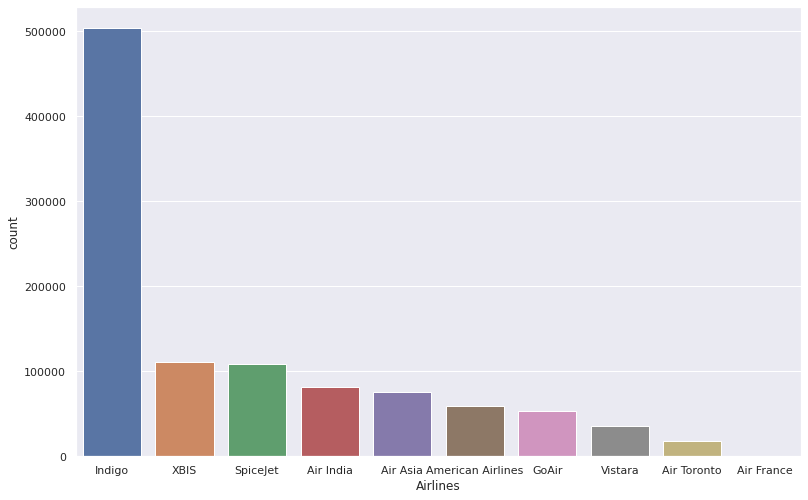

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Airlines",data=data,order=pd.value_counts(data["Airlines"]).iloc[:10].index)
sns.set(rc={'figure.figsize':(13,14)})


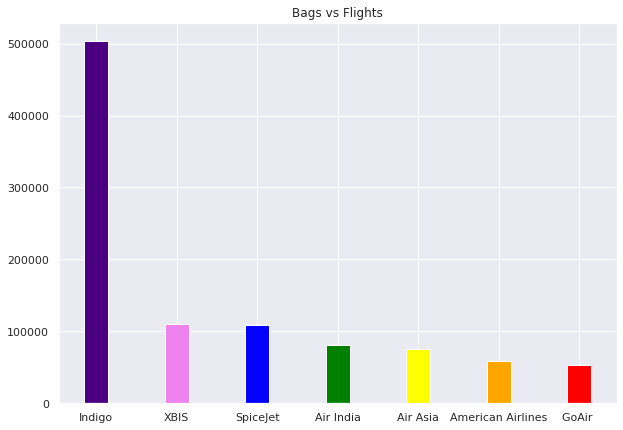

In [ ]:
flights=['Indigo','XBIS','SpiceJet','Air India','Air Asia','American Airlines','GoAir ']
passengers=[ 503795,110833,109161,81682,75303,59414,52799]
colors=['Indigo','Violet','Blue','Green','Yellow','Orange','Red','Pink','Brown']
plt.figure(figsize=(10,7))
plt.bar(flights,passengers,color=colors,width=0.3)
plt.title('Bags vs Flights')
plt.show()


In [ ]:
datanew = data.drop(['BagID','L1Decision'],axis = 1)

In [ ]:
datanew

,XBIS,BHSID,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,Airlines
0,2,312,01/01/2020 00:16:19,Time out,32661.0,01/01/2020 00:16:46,Reject,32887,01/01/2020 00:16:54,Indigo
1,2,312,01/01/2020 00:19:28,Accept,32661.0,01/01/2020 00:19:41,-,-,-,Indigo
2,2,312,01/01/2020 00:24:39,Accept,32153.0,01/01/2020 00:24:44,-,-,-,Indigo
3,2,312,01/01/2020 00:28:31,Accept,32153.0,01/01/2020 00:28:42,-,-,-,Indigo
4,2,312,01/01/2020 00:33:42,Accept,32153.0,01/01/2020 00:33:47,-,-,-,Indigo
...,...,...,...,...,...,...,...,...,...,...
1048569,1,312,3/24/2020 12:30:48,Accept,34243.0,3/24/2020 12:31:02,-,-,-,Indigo
1048570,1,312,3/24/2020 12:30:51,Accept,32797.0,3/24/2020 12:31:11,-,-,-,Indigo
1048571,1,777,3/24/2020 12:35:19,Accept,36548.0,3/24/2020 12:35:35,-,-,-,Air Toronto
1048572,1,312,3/24/2020 12:35:22,Accept,34243.0,3/24/2020 12:35:47,-,-,-,Indigo


In [ ]:
##converting string datatime to python datetime object L1 and L2 datetimes
datanew['Level1Decision']=pd.to_datetime(datanew['Level1Decision'])
datanew['L2DecisionTime']=pd.to_datetime(datanew['L2DecisionTime'])

In [ ]:
##converting string datatime to python datetime object L3 datetimes
datanew['L3DecisionTime']=pd.to_datetime(datanew['L3DecisionTime'],errors='coerce')
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   XBIS            1048574 non-null  int64         
 1   BHSID           1048568 non-null  object        
 2   Level1Decision  1048574 non-null  datetime64[ns]
 3   L2Decision      1048574 non-null  object        
 4   L2LoginID       1015291 non-null  float64       
 5   L2DecisionTime  1048574 non-null  datetime64[ns]
 6   L3Decision      1048574 non-null  object        
 7   L3LoginID       1046776 non-null  object        
 8   L3DecisionTime  235833 non-null   datetime64[ns]
 9   Airlines        1047246 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 80.0+ MB


# "" <font color="red">Operators Performance</font>""

**Operator2**

In [ ]:
### Operator 2 (L2-L1 time)
datanew['L2operatortime']=datanew['L2DecisionTime']-datanew['Level1Decision']

## To covert L2 time in Seconds ##
datanew['L2operatorsecs']=datanew['L2operatortime'].dt.total_seconds().astype(int)

In [ ]:
print("time differences mean:",datanew["L2operatorsecs"].mean())
print("max of :",datanew["L2operatorsecs"].max())
print("min of :",datanew["L2operatorsecs"].min())

time differences mean: 15.023135229368647
max of : 111
min of : -8984


In [ ]:
datanew.nlargest(3,"L2operatorsecs")

,XBIS,BHSID,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,Airlines,L2operatortime,L2operatorsecs
61112,2,312,2020-01-02 08:11:16,Default Reject,32880.0,2020-01-02 08:13:07,Reject,4130,2020-01-02 08:14:02,Indigo,0 days 00:01:51,111
73850,2,312,2020-01-12 07:13:41,Default Reject,32878.0,2020-01-12 07:15:31,Accept,31230,2020-01-12 07:15:35,Indigo,0 days 00:01:50,110
353117,4,807,2020-01-09 06:22:41,Default Reject,32149.0,2020-01-09 06:24:31,Accept,32646,2020-01-09 06:25:22,Air Asia,0 days 00:01:50,110


In [ ]:
datanew.nsmallest(3,"L2operatorsecs")

,XBIS,BHSID,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,Airlines,L2operatortime,L2operatorsecs
1001241,2,312,2020-07-16 07:26:44,Accept,2927.0,2020-07-16 04:57:00,-,-,NaT,Indigo,-1 days +21:30:16,-8984
4643,2,312,2020-01-11 03:31:02,Default Reject,NaN,2020-01-11 03:31:02,Accept,32652,2020-01-11 03:31:12,Indigo,0 days 00:00:00,0
4644,2,000,2020-01-11 03:31:12,Default Reject,NaN,2020-01-11 03:31:12,Accept,32652,2020-01-11 03:31:16,XBIS,0 days 00:00:00,0


In [ ]:
datanew=datanew.drop(1001241)

In [ ]:
print("Min secs in operator l2",datanew["L2operatorsecs"].min())

Min secs in operator l2 0


In [ ]:
## checking null values in L2operator time
datanew['L2operatorsecs'].isnull().sum()

0

In [ ]:
datanew.head()

,XBIS,BHSID,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,Airlines,L2operatortime,L2operatorsecs
0,2,312,2020-01-01 00:16:19,Time out,32661.0,2020-01-01 00:16:46,Reject,32887,2020-01-01 00:16:54,Indigo,0 days 00:00:27,27
1,2,312,2020-01-01 00:19:28,Accept,32661.0,2020-01-01 00:19:41,-,-,NaT,Indigo,0 days 00:00:13,13
2,2,312,2020-01-01 00:24:39,Accept,32153.0,2020-01-01 00:24:44,-,-,NaT,Indigo,0 days 00:00:05,5
3,2,312,2020-01-01 00:28:31,Accept,32153.0,2020-01-01 00:28:42,-,-,NaT,Indigo,0 days 00:00:11,11
4,2,312,2020-01-01 00:33:42,Accept,32153.0,2020-01-01 00:33:47,-,-,NaT,Indigo,0 days 00:00:05,5


In [ ]:
l2_operator = datanew.drop(['XBIS','BHSID',"Airlines",'Level1Decision',"L3Decision","L3LoginID","L3DecisionTime",'L2operatortime','L2DecisionTime'],axis=1)
l2_operator.head()

,L2Decision,L2LoginID,L2operatorsecs
0,Time out,32661.0,27
1,Accept,32661.0,13
2,Accept,32153.0,5
3,Accept,32153.0,11
4,Accept,32153.0,5


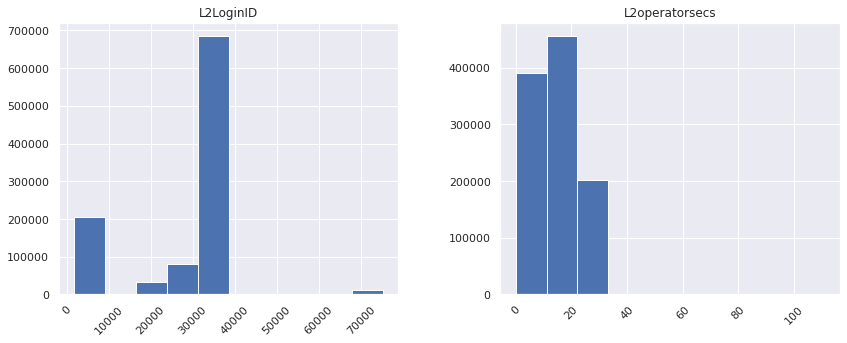

In [ ]:
# Plot each numeric feature
l2_operator.hist(figsize=(14,5), xrot=45)
plt.show()

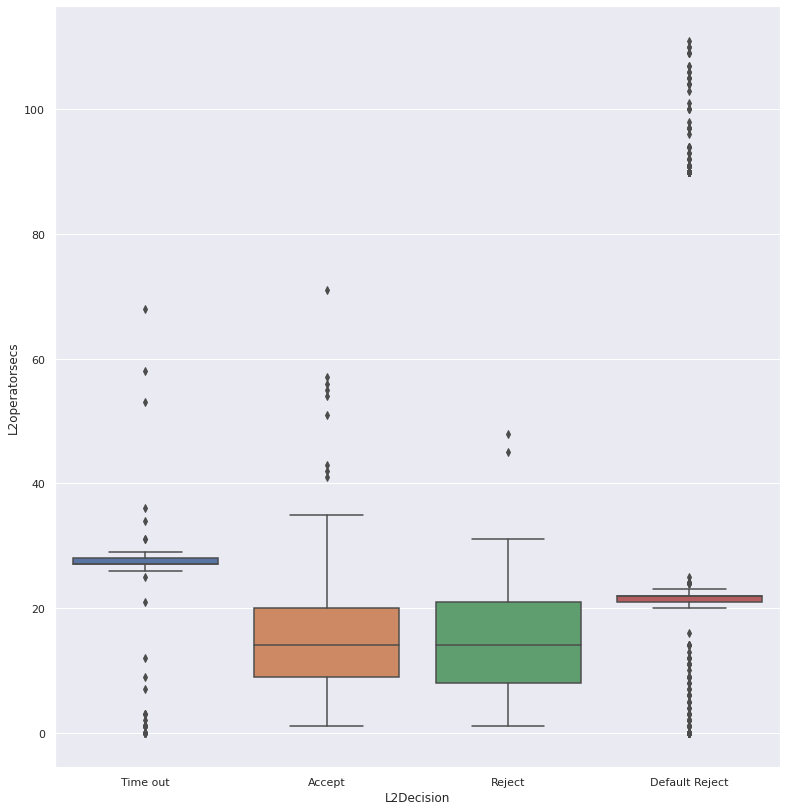

In [ ]:
sns.boxplot(data=l2_operator,x="L2Decision",y="L2operatorsecs")

In [ ]:
l2_operator=l2_operator[~(l2_operator["L2Decision"].str.contains("Default Reject"))]

In [ ]:
l2_operator=l2_operator[~((l2_operator["L2Decision"].str.contains("Accept")) & (l2_operator.L2operatorsecs>25))]

l2_operator=l2_operator[~((l2_operator["L2Decision"].str.contains("Reject")) & (l2_operator.L2operatorsecs>25))]

l2_operator=l2_operator[~((l2_operator.L2Decision.str.contains("Time out"))& (l2_operator.L2operatorsecs<=25))]

In [ ]:
l2_operator["L2operatorsecs"].value_counts()

9     50238
8     49717
10    49483
7     48629
11    48141
12    46742
6     46458
13    44667
14    42778
5     41490
15    40928
16    39327
17    37738
18    36508
19    35115
22    34596
20    34570
24    34507
23    34490
4     34301
21    34163
25    33753
3     18552
27    15207
28     6080
2      3128
26     1134
1        88
29       21
31        2
58        1
34        1
36        1
53        1
68        1
Name: L2operatorsecs, dtype: int64

In [ ]:
bin_labels=["Excellent","Good","Normal","Bad"]

In [ ]:
l2_operator[l2_operator["L2Decision"].str.contains("Time out")]

,L2Decision,L2LoginID,L2operatorsecs
0,Time out,32661.0,27
14,Time out,31230.0,27
23,Time out,32878.0,27
52,Time out,32648.0,28
120,Time out,32648.0,28
...,...,...,...
1048146,Time out,33646.0,27
1048147,Time out,32149.0,27
1048150,Time out,33646.0,27
1048412,Time out,31225.0,27


In [ ]:
l2_operator.loc[(~l2_operator["L2Decision"].str.contains("Time out"))&(l2_operator["L2operatorsecs"]>=0) & (l2_operator["L2operatorsecs"]<8),"performance"]="Excellent"

In [ ]:
l2_operator.loc[(~l2_operator["L2Decision"].str.contains("Time out"))&(l2_operator["L2operatorsecs"]>=8) & (l2_operator["L2operatorsecs"]<17),"performance"]="Good"

l2_operator.loc[(~l2_operator["L2Decision"].str.contains("Time out"))&(l2_operator["L2operatorsecs"]>=17) & (l2_operator["L2operatorsecs"]<=25),"performance"]="Normal"

l2_operator.loc[(l2_operator["L2Decision"].str.contains("Time out"))& (l2_operator["L2operatorsecs"]>25) ,"performance"]="Bad"


In [ ]:
l2_operator['performance'].value_counts()


Good         412021
Normal       315440
Excellent    192646
Bad           22449
Name: performance, dtype: int64

In [ ]:
l2_operator['L2Decision'].value_counts()

Accept      755936
Reject      164171
Time out     22449
Name: L2Decision, dtype: int64

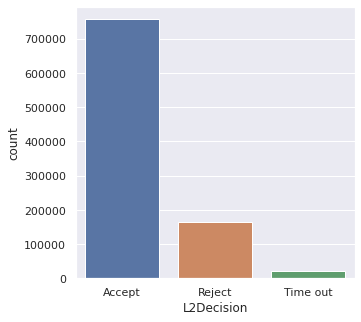

In [ ]:
sns.countplot(x="L2Decision",data=l2_operator,order=pd.value_counts(l2_operator["L2Decision"]).index)
sns.set(rc={'figure.figsize':(5,5)})

In [ ]:
l2_operator.shape

(942556, 4)

In [ ]:
l2_operator

,L2Decision,L2LoginID,L2operatorsecs,performance
0,Time out,32661.0,27,Bad
1,Accept,32661.0,13,Good
2,Accept,32153.0,5,Excellent
3,Accept,32153.0,11,Good
4,Accept,32153.0,5,Excellent
...,...,...,...,...
1048569,Accept,34243.0,14,Good
1048570,Accept,32797.0,20,Normal
1048571,Accept,36548.0,16,Good
1048572,Accept,34243.0,25,Normal


In [ ]:
l2_operator['L2Decision'].value_counts()

Accept      755936
Reject      164171
Time out     22449
Name: L2Decision, dtype: int64

**Operator3**

In [ ]:
### Operator 3 performance (L3-L2)
datanew['L3operatortime']=datanew['L3DecisionTime']-datanew['L2DecisionTime']

### To convert L3 time in seconds ###
datanew['L3operatorsecs']=datanew['L3operatortime']/np.timedelta64(1,'s')

In [ ]:
print("time differences mean:",datanew["L3operatorsecs"].mean())
print("max of :",datanew["L3operatorsecs"].max())
print("min of :",datanew["L3operatorsecs"].min())

time differences mean: 25.09444819003278
max of : 146.0
min of : 0.0


In [ ]:
datanew.nlargest(3,"L3operatorsecs")

,XBIS,BHSID,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,Airlines,L2operatortime,L2operatorsecs,L3operatortime,L3operatorsecs
142357,2,312,2020-01-13 12:17:04,Reject,31230.0,2020-01-13 12:17:09,Default Reject,36548,2020-01-13 12:19:35,Indigo,0 days 00:00:05,5,0 days 00:02:26,146.0
174652,3,775,2020-01-14 08:08:22,Reject,2918.0,2020-01-14 08:08:48,Default Reject,5944,2020-01-14 08:11:14,SpiceJet,0 days 00:00:26,26,0 days 00:02:26,146.0
501003,3,312,2020-02-29 19:08:28,Reject,2918.0,2020-02-29 19:08:52,Default Reject,32149,2020-02-29 19:11:18,Indigo,0 days 00:00:24,24,0 days 00:02:26,146.0


In [ ]:
datanew.nsmallest(3,"L3operatorsecs")

,XBIS,BHSID,Level1Decision,L2Decision,L2LoginID,L2DecisionTime,L3Decision,L3LoginID,L3DecisionTime,Airlines,L2operatortime,L2operatorsecs,L3operatortime,L3operatorsecs
13274,4,001,2020-01-11 06:03:01,Default Reject,NaN,2020-01-11 06:03:23,Default Reject,NaN,2020-01-11 06:03:23,American Airlines,0 days 00:00:22,22,0 days,0.0
13275,3,775,2020-01-11 06:03:02,Default Reject,NaN,2020-01-11 06:03:23,Default Reject,NaN,2020-01-11 06:03:23,SpiceJet,0 days 00:00:21,21,0 days,0.0
13276,4,098,2020-01-11 06:03:03,Reject,32792.0,2020-01-11 06:03:30,Default Reject,NaN,2020-01-11 06:03:30,Air India,0 days 00:00:27,27,0 days,0.0


In [ ]:
print("Min secs in operator l3",datanew["L3operatorsecs"].min())

Min secs in operator l3 0.0


In [ ]:
## checking null values in L3operator time
datanew['L3operatorsecs'].isnull().sum()

812740

In [ ]:
datanew.columns

Index(['XBIS', 'BHSID', 'Level1Decision', 'L2Decision', 'L2LoginID',
       'L2DecisionTime', 'L3Decision', 'L3LoginID', 'L3DecisionTime',
       'Airlines', 'L2operatortime', 'L2operatorsecs', 'L3operatortime',
       'L3operatorsecs'],
      dtype='object')

In [ ]:
l3_operator=datanew.drop(['XBIS', 'BHSID', 'Level1Decision', 'L2Decision', 'L2LoginID','L2DecisionTime','L3DecisionTime','Airlines', 'L2operatortime', 'L2operatorsecs', 'L3operatortime'],axis=1)

In [ ]:
l3_operator

,L3Decision,L3LoginID,L3operatorsecs
0,Reject,32887,8.0
1,-,-,NaN
2,-,-,NaN
3,-,-,NaN
4,-,-,NaN
...,...,...,...
1048569,-,-,NaN
1048570,-,-,NaN
1048571,-,-,NaN
1048572,-,-,NaN


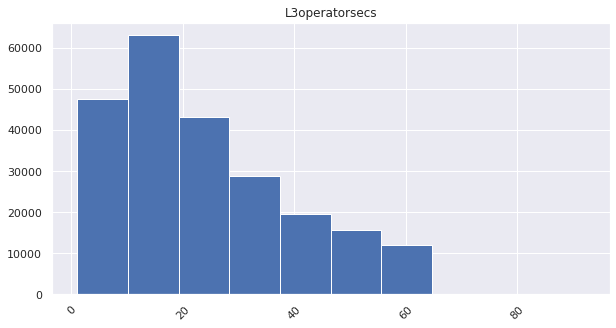

In [ ]:
# Plot each numeric feature
l3_operator.hist(figsize=(10,5), xrot=45)
plt.show()

In [ ]:
l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("-"))]

In [ ]:
l3_operator.isna().sum()

L3Decision           0
L3LoginID         1798
L3operatorsecs       0
dtype: int64

In [ ]:
l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Default Reject"))]

In [ ]:
l3_operator["L3Decision"].value_counts()

Accept      149033
Reject       81713
Time out      3169
Name: L3Decision, dtype: int64

In [ ]:
l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Accept") & (l3_operator.L3operatorsecs>60))]

l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Reject") & (l3_operator.L3operatorsecs>60))]

l3_operator=l3_operator[~(l3_operator["L3Decision"].str.contains("Time out") & (l3_operator.L3operatorsecs<60))]

In [ ]:
l3_operator.loc[(~l3_operator["L3Decision"].str.contains("Time out"))&(l3_operator["L3operatorsecs"]>=0) & (l3_operator["L3operatorsecs"]<20),"performance"]="Excellent"

In [ ]:
l3_operator.loc[(~l3_operator["L3Decision"].str.contains("Time out"))&(l3_operator["L3operatorsecs"]>=20) & (l3_operator["L3operatorsecs"]<40),"performance"]="Good"

l3_operator.loc[(~l3_operator["L3Decision"].str.contains("Time out"))&(l3_operator["L3operatorsecs"]>=40) & (l3_operator["L3operatorsecs"]<=60),"performance"]="Normal"

l3_operator.loc[(l3_operator["L3Decision"].str.contains("Time out"))& (l3_operator["L3operatorsecs"]>60) ,"performance"]="Bad"

In [ ]:
l3_operator.isna().sum()

L3Decision        0
L3LoginID         0
L3operatorsecs    0
performance       0
dtype: int64

In [ ]:
l3_operator["performance"].value_counts()

Excellent    110473
Good          76913
Normal        39300
Bad            3164
Name: performance, dtype: int64

In [ ]:
l3_operator

,L3Decision,L3LoginID,L3operatorsecs,performance
0,Reject,32887,8.0,Excellent
8,Accept,32887,42.0,Normal
9,Reject,5525,9.0,Excellent
12,Reject,5525,9.0,Excellent
14,Accept,32887,24.0,Good
...,...,...,...,...
1048547,Accept,32661,14.0,Excellent
1048560,Accept,6320,41.0,Normal
1048561,Accept,4402,47.0,Normal
1048566,Accept,32661,22.0,Good


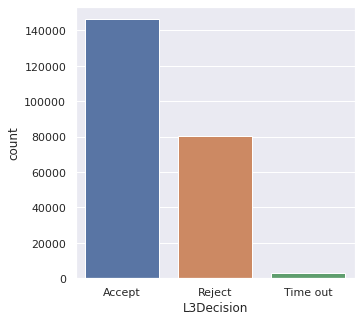

In [ ]:
sns.countplot(x="L3Decision",data=l3_operator,order=pd.value_counts(l3_operator["L3Decision"]).index)
sns.set(rc={'figure.figsize':(5,5)})

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
l2_operator.to_csv('l2_operator.csv', encoding = "utf-8",index=False)

In [ ]:
l3_operator.to_csv('l3_operator.csv', encoding = "utf-8",index=False)

In [ ]:
l2_operator = pd.read_csv('/content/l2_operator.csv',encoding="ISO-8859-1")

In [ ]:
l3_operator = pd.read_csv('/content/l3_operator.csv',encoding="ISO-8859-1")

In [ ]:
l2_operator.describe()

In [ ]:
l2_operator.info()

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
l2_operator.columns

In [ ]:
l2operator = l2_operator.drop(['Unnamed: 0'],axis=1,inplace=False)

In [ ]:
l2operator.columns

In [ ]:
l2operator.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
l2operator['performance']= labelencoder.fit_transform(l2operator['performance'])
l2operator['L2Decision']= labelencoder.fit_transform(l2operator['L2Decision'])

In [ ]:
l2operator

In [ ]:
l2operator.info()

In [ ]:
train, test = train_test_split(l2operator, test_size = 0.2)

In [ ]:
l2operator = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 0:3], train.iloc[:, 3])
help(LogisticRegression)

In [ ]:
test_predict = l2operator.predict(test.iloc[:, 0:3])

In [ ]:
accuracy_score(test.iloc[:,3], test_predict)

In [ ]:
train_predict = l2operator.predict(train.iloc[:, 0:3])

In [ ]:
accuracy_score(train.iloc[:,3], train_predict)

In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
logreg = lm.LogisticRegression()

L3 **Operator**

In [ ]:
l3_operator.describe()

In [ ]:
l3_operator.info()

In [ ]:
l3_operator.columns

In [ ]:
l3operator = l3_operator.drop(['Unnamed: 0'],axis=1)

In [ ]:
l3operator.columns

In [ ]:
l3operator['performance']= labelencoder.fit_transform(l3operator['performance'])
l3operator['L3Decision']= labelencoder.fit_transform(l3operator['L3Decision'])

In [ ]:
l3operator

In [ ]:
train, test = train_test_split(l3operator, test_size = 0.2)

In [ ]:
l3operator = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 0:3], train.iloc[:, 3])

In [ ]:
test_predict = l3operator.predict(test.iloc[:, 0:3])

In [ ]:
accuracy_score(test.iloc[:,3], test_predict)

In [ ]:
train_predict = l3operator.predict(train.iloc[:, 0:3])

In [ ]:
accuracy_score(train.iloc[:,3], train_predict)